# Import Library

In [30]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

In [31]:
#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

# Load the Data

In [32]:
colorectal_df = pd.read_csv('colorectal_ml_data.csv')

In [33]:
colorectal_df

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,sample_type
0,3.668103,4.153008,3.401461,3.915518,7.376831,2.068961,2.815502,2.637667,2.515842,2.470253,...,2.171258,2.301055,2.082480,7.023443,4.885838,5.996857,2.180664,2.143840,2.112155,Mucosa
1,2.552636,4.188395,3.130526,3.736452,7.781563,2.309641,2.899258,2.405016,2.580665,2.199707,...,1.958912,2.062292,2.047534,7.316119,5.238207,6.263651,1.922922,2.261792,2.311441,Mucosa
2,3.319206,4.116970,3.254302,4.123577,6.490103,2.169527,2.740670,2.417271,2.592297,2.604158,...,2.425428,2.459687,2.208400,8.021523,5.811114,6.369939,2.180858,2.216643,2.225330,Mucosa
3,3.174137,4.376609,3.123351,3.357785,7.041836,2.181981,2.472447,2.288845,2.348740,2.467252,...,2.749743,2.474504,2.314847,7.102487,4.688705,5.138329,1.992875,2.276514,2.257504,Mucosa
4,3.002871,4.554020,3.374672,3.356307,6.941473,2.501181,2.858133,2.474647,2.360849,2.367759,...,2.124112,2.652263,2.418084,7.728243,5.234767,6.122501,2.176288,2.297174,2.116751,Mucosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2.770133,3.817872,3.110288,4.323042,3.107871,2.195812,2.491845,2.413078,2.240754,2.191541,...,2.320057,2.392613,2.107074,6.895752,4.958211,5.902607,2.061423,1.968173,2.199589,Tumor
242,2.585589,3.801793,2.800115,3.256401,2.655157,2.066929,2.873851,2.338475,2.061385,2.134022,...,2.090564,2.245866,2.022377,7.007755,4.982673,5.821546,1.900465,2.159099,2.013992,Tumor
243,3.140119,4.361736,3.415892,3.434901,3.018483,2.166360,2.757030,2.424478,2.021578,2.223915,...,2.431213,2.186004,2.241437,6.450306,4.329660,5.151521,2.103759,2.067776,2.021599,Tumor
244,4.806558,5.504357,4.433731,4.611937,2.786727,2.320301,2.559451,2.248668,2.288134,2.219938,...,2.498920,2.064534,2.173000,6.983111,4.950685,6.041215,2.010045,2.265831,2.230217,Tumor


# Separate the Data into Target and Feature Variable

In [34]:
X=colorectal_df.iloc[:,0:-1]
y=colorectal_df.iloc[:,-1]

In [35]:
y

0      Mucosa
1      Mucosa
2      Mucosa
3      Mucosa
4      Mucosa
        ...  
241     Tumor
242     Tumor
243     Tumor
244     Tumor
245     Tumor
Name: sample_type, Length: 246, dtype: object

# Encode Lables

In [36]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [37]:
classes

array([0, 1, 2])

In [38]:
labels

array(['Mucosa', 'Normal', 'Tumor'], dtype=object)

# Data splilting into traning testing and validation sets

In [39]:
# Split data into train, validation, and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

In [40]:
X_train

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
117,3.305133,4.018128,3.125661,3.568369,7.111391,2.169763,2.636730,2.053043,2.136687,2.356132,...,1.900717,2.333090,2.382277,2.112722,7.222178,4.467261,5.842420,1.934715,2.170923,2.239572
77,3.495471,3.643607,3.177676,3.206620,7.479013,2.215459,2.725922,2.486563,2.338050,2.606338,...,1.857167,2.020851,2.351107,1.874882,7.965107,5.415568,6.703836,2.078080,2.056264,2.127428
85,2.750157,4.127218,2.994668,3.312701,8.070898,2.275392,2.654698,2.255935,2.714755,2.536977,...,2.091903,2.126884,2.387963,2.042259,7.599278,4.239063,5.709859,2.083728,2.086177,2.124417
149,3.381707,4.533095,3.277144,3.921616,3.201409,2.472379,2.740552,2.467507,2.332871,2.363103,...,1.923695,2.120772,2.886028,2.089173,6.745093,4.551432,5.575777,2.108664,2.328388,2.445478
12,2.920480,4.111251,3.416264,3.138600,6.444130,2.105623,2.602458,2.523141,2.202681,2.572977,...,1.994716,2.265192,2.311487,1.991772,6.986075,3.991263,5.288527,2.006648,2.304287,2.285243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2.855803,4.083082,3.475604,3.122973,7.433741,2.442851,2.813052,2.303914,2.536561,2.457151,...,2.099529,2.982809,3.016348,2.194877,8.387146,4.775312,6.598466,2.168045,2.296298,2.190808
112,3.054147,3.818983,3.116618,4.007642,7.354764,1.950203,2.500867,2.214814,2.260982,2.448964,...,1.864988,2.219228,2.389769,2.344345,7.047697,4.352113,5.295683,2.191117,1.997042,2.169755
9,3.147607,4.750861,3.579223,3.609026,7.249918,2.082413,3.146732,2.772867,2.421706,2.284627,...,2.006824,2.203623,2.497373,1.864402,6.902774,4.574314,5.637065,2.047153,2.269815,2.185190
111,3.233408,3.998577,3.550536,3.321810,7.765938,2.246701,3.144037,2.519728,2.461121,2.251718,...,2.020722,2.252036,2.210956,2.146681,7.484743,5.310916,6.349687,2.057348,2.177602,2.116938


In [41]:
y_train

array([1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2,
       0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 2,
       0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2,
       0, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2])

In [42]:
# Standardize the data using Z-score normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_val_norm = scaler.transform(X_val)

In [43]:
X_train_norm

array([[ 0.01088078, -0.2762034 , -0.53976674, ..., -1.27458628,
         0.01759899,  0.35290909],
       [ 0.37841664, -1.1427695 , -0.43146865, ...,  0.16096137,
        -0.9410445 , -0.6791277 ],
       [-1.06075871, -0.02379138, -0.81249821, ...,  0.21751453,
        -0.69094155, -0.70683952],
       ...,
       [-0.2932966 ,  1.4191924 ,  0.40456999, ..., -0.1487113 ,
         0.84441843, -0.14755508],
       [-0.12761714, -0.32144157,  0.34484218, ..., -0.04662615,
         0.07344091, -0.77567125],
       [ 1.13095612,  1.63826453,  1.31858283, ..., -0.1439297 ,
        -1.54185962, -0.18227054]])

# Feature Selection Methods

In [44]:
# Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k=1000)
X_train_selected = selector.fit_transform(X_train_norm, y_train)
X_test_selected = selector.transform(X_test_norm)
X_val_selected = selector.transform(X_val_norm)
selected_features = X.columns[selector.get_support()]

# Model Traning

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Model Training - Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_selected, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best hyperparameters for Random Forest:", best_params_rf)

rf_clf = RandomForestClassifier(**best_params_rf, random_state=42)
rf_clf.fit(X_train_selected, y_train)

# Model Evaluation - Random Forest
y_pred_rf = rf_clf.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)


Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of Random Forest: 0.98


Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       1.00      0.95      0.97        20
       Tumor       0.95      1.00      0.98        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



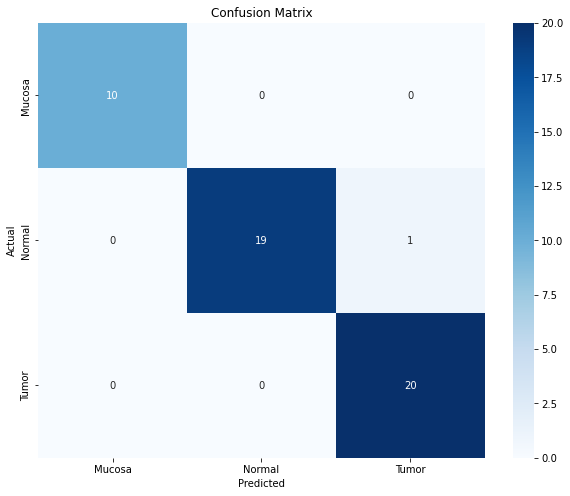

In [46]:

accuracy = accuracy_score(y_test, y_pred_rf)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='macro')
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_rf, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
# Evaluate the model performance on the validation set
# For Random Forest
y_val_pred_rf = rf_clf.predict(X_val_selected)
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print("Accuracy of Random Forest on validation set:", accuracy_val_rf)

Accuracy of Random Forest on validation set: 0.9387755102040817


In [48]:
# Model Training - SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_selected, y_train)
best_params_svm = grid_search_svm.best_params_
print("Best hyperparameters for SVM:", best_params_svm)

svm_clf = SVC(**best_params_svm, random_state=42)
svm_clf.fit(X_train_selected, y_train)

# Model Evaluation - SVM
y_pred_svm = svm_clf.predict(X_test_selected)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)

Best hyperparameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy of SVM: 0.88


Accuracy: 0.88
Balanced Accuracy: 0.85
F1-score: 0.87
Precision: 0.92
Recall: 0.85

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      0.70      0.82        10
      Normal       1.00      0.85      0.92        20
       Tumor       0.77      1.00      0.87        20

    accuracy                           0.88        50
   macro avg       0.92      0.85      0.87        50
weighted avg       0.91      0.88      0.88        50



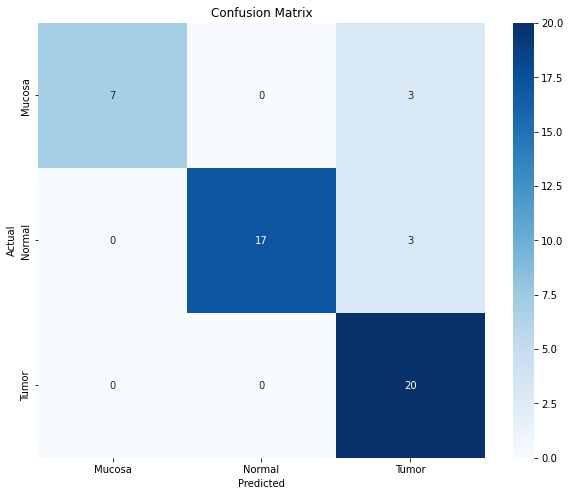

In [49]:

accuracy = accuracy_score(y_test, y_pred_svm)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='macro')
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_svm, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
# For SVM
y_val_pred_svm = svm_clf.predict(X_val_selected)
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
print("Accuracy of SVM on validation set:", accuracy_val_svm)

Accuracy of SVM on validation set: 0.9387755102040817
